# 1. Import Essential Python Libs

In [2]:
#Import necessary python libraries
import numpy as np #algebric computations
import pandas as pd #data processing/handling
import matplotlib.pyplot as plt # data visualization
%matplotlib inline 
import seaborn as sns #for visualization
import warnings #need to suppress warnings
warnings.filterwarnings("ignore")

# 2. Data Reading

In [4]:
loan_df = pd.read_csv('./loan/loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_df.shape

(39717, 111)

# 3. Date Cleaning: Remove Redundant or non-relevant column

## 3.1 Remove Columns where all entries are NULL

In [6]:
loan_df = loan_df.dropna(axis='columns')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


## 3.2 Remove Column which has fixed one value as it may not show relationship

In [7]:
single_value_cols = []
loan_df1_dict = {}
for col in loan_df.columns:
    loan_df1_dict = loan_df[col].value_counts()
    if (len(loan_df1_dict)==1):
        single_value_cols.append(col)


In [8]:
loan_df1 = loan_df.drop(columns=single_value_cols)
loan_df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79


## 3.3 Visualize distribution of loan status

<AxesSubplot:>

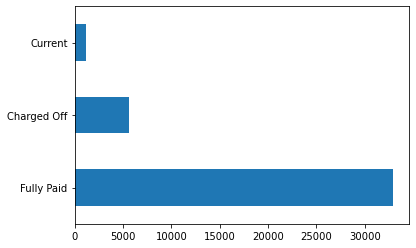

In [9]:
loan_df1['loan_status'].value_counts().plot.barh()

## 3.4 Analyze & Remove Not-Relevant Columns

In [10]:
loan_df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

In [11]:
loan_df1[['loan_amnt','funded_amnt','funded_amnt_inv']]

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000,5000,4975.0
1,2500,2500,2500.0
2,2400,2400,2400.0
3,10000,10000,10000.0
4,3000,3000,3000.0
...,...,...,...
39712,2500,2500,1075.0
39713,8500,8500,875.0
39714,5000,5000,1325.0
39715,5000,5000,650.0


In [26]:
#let's validate is 'loan_amnt' and 'funded_amnt'are same; if so we can drop one of the column
loan_df1['loan_amnt'].apply(lambda x: int(x))
loan_df1['funded_amnt'].apply(lambda x: int(x))
loan_df1['check'] = loan_df1['loan_amnt'] - loan_df1['funded_amnt']
loan_df1['check'].describe()
loan_df1[(loan_df1['check']==21025)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,check
36894,394329,432932,25000,3975,3925.0,36 months,16.63%,141.0,E,E4,...,0.0,5075.674316,5011.83,3975.0,1100.67,0.0,0.0,0.0,152.06,21025


In [27]:
loan_df1[(loan_df1['check']==21025)].loan_status

36894    Fully Paid
Name: loan_status, dtype: object

In [29]:
#conclusion we can drop this exceptional row as loan is fully paid; and also we can keep 'loan_amnt' and drop column 'funded_amnt'
loan_df1 = loan_df1[~(loan_df1['check']==21025)]

In [30]:
loan_df1.shape

(39716, 38)

In [32]:
loan_df1.drop(columns='funded_amnt')

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,check
0,1077501,1296599,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0
1,1077430,1314167,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0
2,1077175,1313524,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0
3,1076863,1277178,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0
4,1075358,1311748,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,1075.0,36 months,8.07%,78.42,A,A4,MORTGAGE,...,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,0
39713,90665,90607,8500,875.0,36 months,10.28%,275.38,C,C1,RENT,...,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,0
39714,90395,90390,5000,1325.0,36 months,8.07%,156.84,A,A4,MORTGAGE,...,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,0
39715,90376,89243,5000,650.0,36 months,7.43%,155.38,A,A2,MORTGAGE,...,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,0


In [ ]:
#let's validate is 'loan_amnt' and 'funded_amnt'are same; if so we can drop one of the column